# 불균형 분류에 대한 Random Oversampling 및 Undersampling 

## Random Undersampling 

- Random Undersampling은 다수 클래스에서 example 을 삭제하므로 모델에 중요한 정보를 잃을 수 있습니다.


## Random Oversampling

- Random Oversampling은 훈련 데이터 세트의 소수 클래스의 예제를 복제하므로 일부 모델에 대해 과적합을 초래할 수 있습니다.  

- Training set 에서 복원 추출    

## Imbalanced-Learn Library

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

In [2]:
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

make_classification : 랜덤 n-class 분류 문제 생성  

- weights :  각 클래스에 할당된 샘플의 비율. None - 균형 class
- flip_y :  클래스가 무작위로 할당된 샘플의 비율. 값이 클수록 레이블에 노이즈가 발생하고 분류 작업이 더 어려워진다.

### 임의의 n-class 분류 문제를 생성
- normal(0) : abnormal(1) = 99:1 의 비율로 data 생성

In [3]:
X, y = make_classification(n_samples=10000, n_features=10, 
            n_classes=2, weights=(0.99,), flip_y=0.0, random_state=0)

X.shape, y.shape, Counter(y)

((10000, 10), (10000,), Counter({0: 9900, 1: 100}))

<Axes: ylabel='count'>

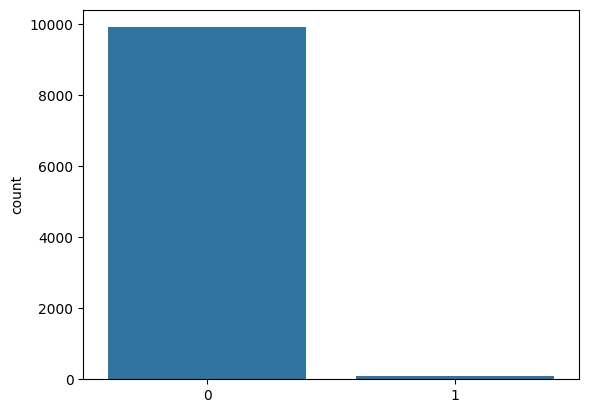

In [4]:
sns.countplot(x=y)

### Over Sampling

sampling_strategy  : 리샘플링 후 다수 클래스 샘플 수에 대한 소수 클래스 샘플 수의 원하는 비율  

- minority class 를 oversampling 하여 normal(0) : abnormal(1) = 2:1 이 되도록 resample

In [5]:
oversample = RandomOverSampler(sampling_strategy=0.5) 

X_over, y_over = oversample.fit_resample(X, y)
X_over.shape, y_over.shape, Counter(y_over)

((14850, 10), (14850,), Counter({0: 9900, 1: 4950}))

<Axes: ylabel='count'>

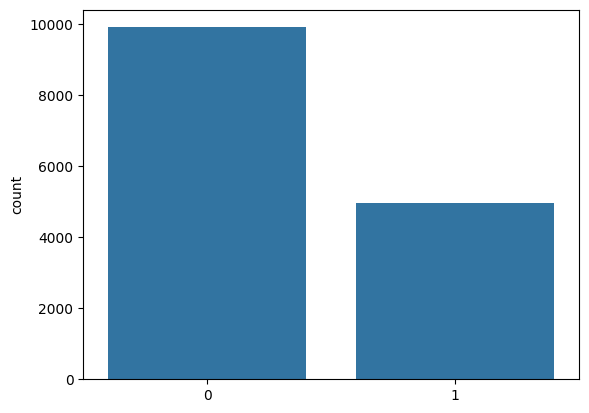

In [6]:
sns.countplot(x=y_over)

### Under Sampling

sampling_strategy : `majority`: 다수 클래스만 리샘플링 

- majority class 를 undersample 하여 normal(0) : abnormal(1) = 1:1 이 되도록 resample

In [7]:
undersample = RandomUnderSampler(sampling_strategy='majority') 

X_under, y_under = undersample.fit_resample(X, y)
X_under.shape, y_under.shape, Counter(y_under)

((200, 10), (200,), Counter({0: 100, 1: 100}))

<Axes: ylabel='count'>

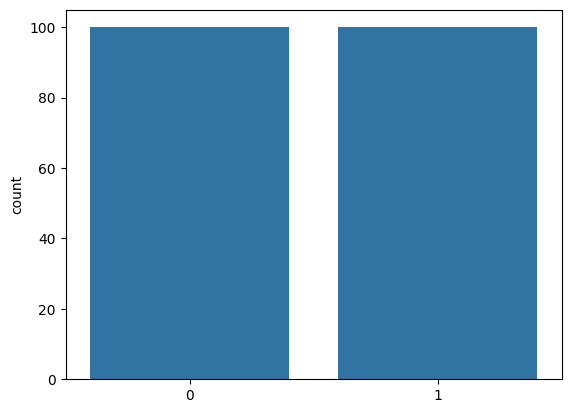

In [8]:
sns.countplot(x=y_under)

## Random Oversampling 과 Undersampling을 동시 적용
- 소수 class 를 oversampling 하여 normal(0) : abnormal(1) = 10:1 이 되도록 하고,  
- 다수 class 를 undersampling 하여 normal(0) : abnormal(1) = 2:1 이 되도록 한다.

In [9]:
# 소수 class 를 oversampling
oversample = RandomOverSampler(sampling_strategy=0.1)

X, y = oversample.fit_resample(X, y)
print(X.shape, y.shape, Counter(y))

# 다수 class 를 undersampling
undersample = RandomUnderSampler(sampling_strategy=0.5)

X, y = undersample.fit_resample(X, y)
print(X.shape, y.shape, Counter(y))

(10890, 10) (10890,) Counter({0: 9900, 1: 990})
(2970, 10) (2970,) Counter({0: 1980, 1: 990})


<Axes: ylabel='count'>

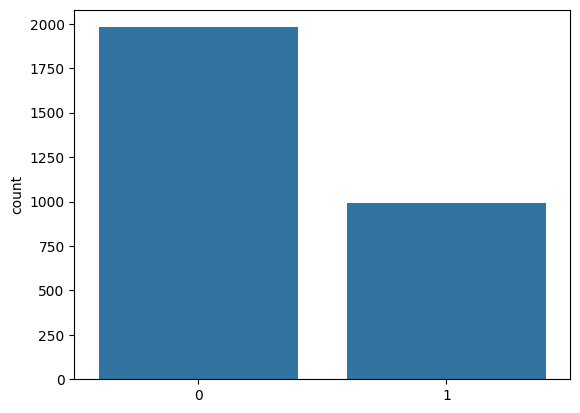

In [10]:
sns.countplot(x=y)

### 임의의 n-class 분류 문제를 생성
- normal(0) : abnormal(1) = 99:1 의 비율로 data 생성

In [11]:
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_classes=2, weights=(0.99,), flip_y=0.0)

X.shape, y.shape, Counter(y)

((1000, 10), (1000,), Counter({0: 990, 1: 10}))

## SMOTE (Synthetic Minority Over-Sampling Technique) 적용

http://www.incodom.kr/SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_over, y_over = smote.fit_resample(X, y)
X_over.shape, y_over.shape

print('SMOTE 적용 전 레이블 비율: ', X.shape, y.shape, Counter(y))
print('SMOTE 적용 후 레이블 비율: ', X_over.shape, y_over.shape, Counter(y_over))

SMOTE 적용 전 레이블 비율:  (1000, 10) (1000,) Counter({0: 990, 1: 10})
SMOTE 적용 후 레이블 비율:  (1980, 10) (1980,) Counter({0: 990, 1: 990})


<Axes: ylabel='count'>

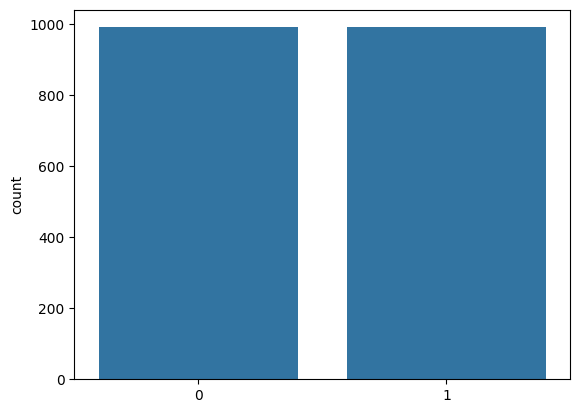

In [13]:
sns.countplot(x=y_over)

- SMOTE 적용 전, 후 분포 시각화  

- 시각화를 위해 2 차원으로 축소

SMOTE 적용전 original data 시각화

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)    # 2 개 component 로 차원 축소

X_pca = pca.fit_transform(X)
X_pca.shape, Counter(y)

((1000, 2), Counter({0: 990, 1: 10}))

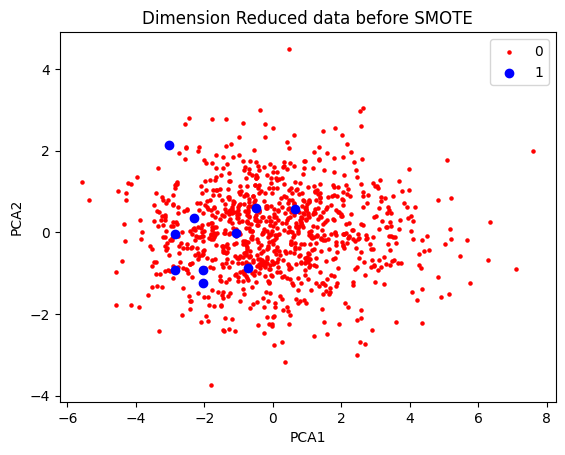

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'b'])

X1, X2 = X_pca[y == 0, 0], X_pca[y == 0, 1]
plt.scatter(X1, X2, color=cmap(0), label=0, s=5)

X1, X2 = X_pca[y == 1, 0], X_pca[y == 1, 1]
plt.scatter(X1, X2, color=cmap(1), label=1)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced data before SMOTE');

SMOTE 적용 후 data 시각화

In [16]:
pca = PCA(n_components=2, random_state=0)                # 2 개 component 로 차원 축소

X_pca = pca.fit_transform(X_over)
X_pca.shape, Counter(y_over)

((1980, 2), Counter({0: 990, 1: 990}))

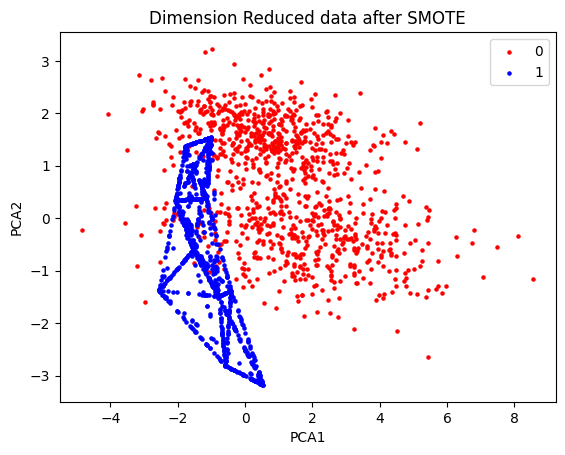

In [17]:
X1, X2 = X_pca[y_over == 0, 0], X_pca[y_over == 0, 1]
plt.scatter(X1, X2, color=cmap(0), label=0, s=5)

X1, X2 = X_pca[y_over == 1, 0], X_pca[y_over == 1, 1]
plt.scatter(X1, X2, color=cmap(1), label=1, s=5)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced data after SMOTE');